In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import dask.dataframe as dd
from sqlalchemy import create_engine
%matplotlib inline

In [2]:
file = '311_Service_Requests_from_2010_to_Present.csv'
print(pd.read_csv(file,nrows=5))

   Unique Key            Created Date             Closed Date Agency  \
0    35449236  02/09/2017 07:00:55 PM  03/24/2017 11:41:38 AM  DOHMH   
1    35449237  02/09/2017 01:34:00 PM  02/16/2017 09:28:40 AM    DOT   
2    35449238  02/09/2017 03:12:07 PM  02/14/2017 03:35:33 PM    DOT   
3    35449239  02/09/2017 04:50:54 PM                     NaN    DPR   
4    35449240  02/09/2017 10:18:00 AM  02/12/2017 12:00:00 PM   DSNY   

                               Agency Name                     Complaint Type  \
0  Department of Health and Mental Hygiene                      Indoor Sewage   
1             Department of Transportation                  Broken Muni Meter   
2             Department of Transportation                 Sidewalk Condition   
3       Department of Parks and Recreation                   New Tree Request   
4                                 Bronx 03  Missed Collection (All Materials)   

                      Descriptor        Location Type  Incident Zip  \
0        

In [3]:
csv_database = create_engine('sqlite:///csv_database.db')
chunksize = 1000000
i = 0
j = 1
for df in pd.read_csv(file, chunksize=chunksize, iterator=True):
      df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) 
      df.index += j
      i+=1
      df.to_sql('nyc', csv_database, if_exists='append')
      j = df.index[-1] + 1

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,17,31,32,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,17,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,17,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=inte

In [5]:
import sqlite3
conn = sqlite3.connect("csv_database.db")
sql = """
SELECT CreatedDate, ComplaintType   
FROM nyc
        """
df_data = pd.read_sql_query(sql, conn)
conn.close()

In [7]:
df_data["ComplaintType"].value_counts()

HEATING                                880472
Noise - Residential                    845556
Street Light Condition                 647854
Street Condition                       624443
HEAT/HOT WATER                         564643
PLUMBING                               554954
GENERAL CONSTRUCTION                   499901
Blocked Driveway                       416700
PAINT - PLASTER                        360577
Illegal Parking                        351442
Traffic Signal Condition               306520
NONCONST                               260423
General Construction/Plumbing          229887
ELECTRIC                               225309
UNSANITARY CONDITION                   199536
Water System                           181124
Noise - Street/Sidewalk                179842
Building/Use                           177037
Damaged Tree                           176914
PAINT/PLASTER                          171814
Noise - Commercial                     156299
Rodent                            

In [10]:
df_data.shape

(11705005, 2)

In [15]:
noise_msk=df_data["ComplaintType"].str.contains("Noise",na=False) 
parking_msk=df_data["ComplaintType"].str.contains("Parking",na=False) 
heating_msk=df_data["ComplaintType"].str.contains("HEAT",na=False)
plumbing_msk=df_data["ComplaintType"].str.contains("PLUMBING",na=False) 
street_msk=df_data["ComplaintType"].str.contains("Street Condition",na=False) 
streetlight=df_data["ComplaintType"].str.contains("Street Light Condition",na=False) 
paint_msk=df_data["ComplaintType"].str.contains("Noise",na=False) 
construction_msk=df_data["ComplaintType"].str.contains("CONSTRUCTION",na=False) 

In [19]:
labels=["Noise","Parking","Heating","Plumbing","Street","Street Light","Paint","Construction","Others"]
sizes=[df_data[noise_msk].shape[0],df_data[parking_msk].shape[0], \
      df_data[heating_msk].shape[0],df_data[plumbing_msk].shape[0], \
      df_data[street_msk].shape[0],df_data[streetlight].shape[0], \
      df_data[paint_msk].shape[0], df_data[construction_msk].shape[0], \
      df_data.shape[0]-df_data[noise_msk].shape[0]-df_data[parking_msk].shape[0]- \
      df_data[heating_msk].shape[0]-df_data[plumbing_msk].shape[0]- \
      df_data[street_msk].shape[0]-df_data[streetlight].shape[0]- \
      df_data[paint_msk].shape[0]- df_data[construction_msk].shape[0]]
explode =(0.1,0,0,0,0,0,0,0,0)



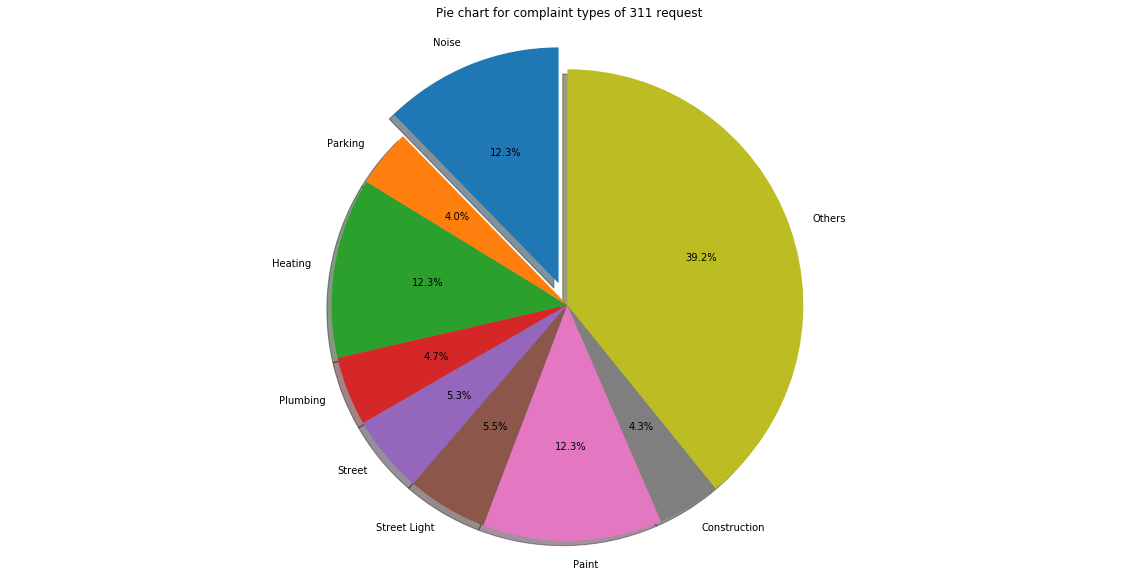

In [24]:
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Pie chart for complaint types of 311 request")

plt.show()